In [10]:
import gym
import gym_classics
import warnings
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import deque
warnings.filterwarnings("ignore")

In [21]:
def tile_coding(state, params):
    low = [-1.2, -0.07]
    high = [0.6, 0.07]
    final_state = [0, 0]
    for i in range(2):
        state_range = high[i] - low[i]
        tile_len = state_range / params["tiles"][i]
        final_state[i] = int((state[i] - low[i]) // tile_len)
    return (final_state[0], final_state[1])

def choose_action(Q, state, params):
    if random.uniform(0,1) < params["epsilon"]:
        return np.random.choice(range(3))
    else:
        return np.argmax(Q[state[0],state[1],:])

def train(env, Q, params):
    tot_steps = 0
    done = False
    trunc = False
    state, info = env.reset()
    state = tile_coding(state, params)
    tot_reward = 0
    while not done and not trunc:
        action = choose_action(Q, state, params)
        nxt_state, reward, done, trunc, info = env.step(action)
        nxt_state = tile_coding(nxt_state, params)

        target = params["gamma"] * np.max(Q[nxt_state[0], nxt_state[1], :])
        if done: target = 0
        td_error = reward + target -  Q[state[0], state[1], action]
        Q[state[0], state[1], action] += params["alpha"] * td_error
        
        tot_reward += reward
        state = nxt_state
    params["epsilon"] *= np.exp(-params["decay_rate"])
    return tot_reward

In [23]:
params = {
    "alpha": 0.5,
    "gamma": 0.95,
    "epsilon": 1,
    "decay_rate": 0.007,
    "tiles": (20, 200),
}

EPISODES = 100
ROUNDS = 50
reward_list = np.zeros(EPISODES)
env = gym.make("MountainCar-v0")

Q = np.zeros((params["tiles"][0], params["tiles"][1], 3))
for i in tqdm(range(EPISODES)):
    for _ in range(ROUNDS):
        reward_list[i] += train(env, Q, params)
reward_list /= ROUNDS

100%|██████████| 100/100 [01:37<00:00,  1.02it/s]


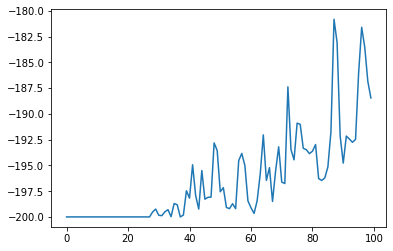

In [24]:
plt.plot(reward_list)
plt.show()

In [25]:
# test model
env = gym.make('MountainCar-v0', render_mode = "human")
state, info = env.reset()
state = tile_coding(state, params)
done = False
trunc = False
rewards = 0
while not done and not trunc:
    action = np.argmax(Q[state[0],state[1],:])
    new_state, reward, done, trunc, info = env.step(action)
    new_state = tile_coding(new_state, params)
    rewards += reward
    state = new_state
    env.render()
    if done:
        break
env.close()
print(int(abs(rewards)), "steps")

195 steps
